# **DSCI100 Project: Predicting Usage of a Video Game Research Server**
- Name: Jonathan Leung
- Student Number: 50203389
- DSCI100-009

## **(1) Data Description:**

The datasets were collected from a Minecraft server set up by a CS group at UBC, led by Frank Wood. The research group collected data regarding the players' actions within the server, such as gameplay, speech, and keystrokes <sup>[1]<sip>

### **Players Dataset** 
Contains 196 observations and 7 variables, including:
1. **experience**: Character variable; Player skill 
2. **subscribe**: Logical variable; Subscription status
3. **hashedEmail**: Character variable; Player encrypted email
4. **played_hours**: Numerical variable; Hours played
5. **name**: Character variable; Player name
6. **gender**: Character variable; Player gender
7. **Age**: Numerical variable; Player age

**Summary Statistics**
- Mean age of players: 21.14 years old
- Median age of players: 19.00 years old
- Mean played hours: 5.85 hours
- Median palyed hours: 0.10 hours

**Problems with dataset**
- Must convert the character variable to factors before being able to tidy data


### **Sessions Dataset** 
Contains 1535 observations and 5 variables, including:
1. **hashedEmail**: Character variable; The player's encrypted email
2. **start_time**: Character variable; Start time of each session (Date and 24 hour time) 
3. **end_time**: Character variable; End time of each session (Date and 24 hour time) 
4. **original_start_time**: Numerical variable; Start time in UNIX timestamp format 
5. **original_end_time**: Numerical variable; End time in UNIX timestamp format 

**Summary Statistics**
- Median start time in UNIX timestamp: 1.719e+12
- Median end time in UNIX timestamp: 1.719e+12

**Problems with dataset**
- The `start_time` and `end_time` variables is not tidy as it contains date and 24 hour time of the beginning/end of session
- UNIX timestamp is in milliseconds

## **(2) Questions:**

- **Broad Question:** (Question 2) We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.
- **Specific Question:** Can a player's age and experience level predict whether a player will become a high data contributor (measured by `played_hours`)?

The `players.csv` dataset will be used primarily, as we are focused on the age, experience, and played hours, rather than the specific session data. To address the specific question, "Can a player's age and experience level predict whether a player will become a high data contributor (measured by `played_hours`)?", the continuous variable `played_hours` can be transformed into a binary variable type, `contributor_type`, labeling players as "high" or "low" contributors based on whether their playtime is in the top 25% of played hours. 

## **(3) Exploratory Data Analysis and Visualization:**

### **i) Loading, Reading, and Summarizing Dataset**

In [115]:
library(tidyverse)
library(tidymodels)
library(readr)
library(dplyr)
library(ggplot2)

options(repr.matrix.max.rows=8)
options(repr.plot.height = 6, repr.plot.width = 6)

In [116]:
players <- read_csv("https://raw.githubusercontent.com/never-knowing/dsci100_project/refs/heads/main/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [117]:
sessions <- read_csv("https://raw.githubusercontent.com/never-knowing/dsci100_project/refs/heads/main/sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
⋮,⋮,⋮,⋮,⋮
7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,01/07/2024 04:08,01/07/2024 04:19,1.71981e+12,1.71981e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [118]:
summary(players)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [119]:
summary(sessions)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

### **ii) Data Wrangling**

In [120]:
players_wrangled_data <- players |> 
    select(experience, Age, played_hours) |>
    arrange(desc(played_hours))|> 
    mutate(experience = as_factor(experience))

players_wrangled_data

experience,Age,played_hours
<fct>,<dbl>,<dbl>
Regular,17,223.1
Regular,20,218.1
Regular,19,178.2
Amateur,16,150.0
⋮,⋮,⋮
Amateur,17,0
Amateur,20,0
Amateur,17,0
Amateur,57,0


In [121]:
# To count how many are in each category of experience (not required, but useful to know when it comes to understanding age and experience factors to predict)
players |>
    count(experience)

experience,n
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


### **iii) Computing Mean Value for Quantitative Variables in `player.csv`**

In [122]:
# Compute mean played hours and age
players |> 
    summarise(
        mean_played_hours = mean(played_hours, na.rm = TRUE),
        mean_age = mean(Age, na.rm = TRUE))

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


#### **Table 1. Mean Values for Quantitative Variables in `players.csv`**
| Variable          | Mean Value |
|--------------------|------------:|
| played_hours       | 5.85 |
| Age                | 21.14 |

Table 1: This table represents the mean values of the quantitative variables `played_hours` and `Age`, rounded to two decimal places.  

### **iv) Exploratory Visualizations**

#### **a) Distribution of Playtime**

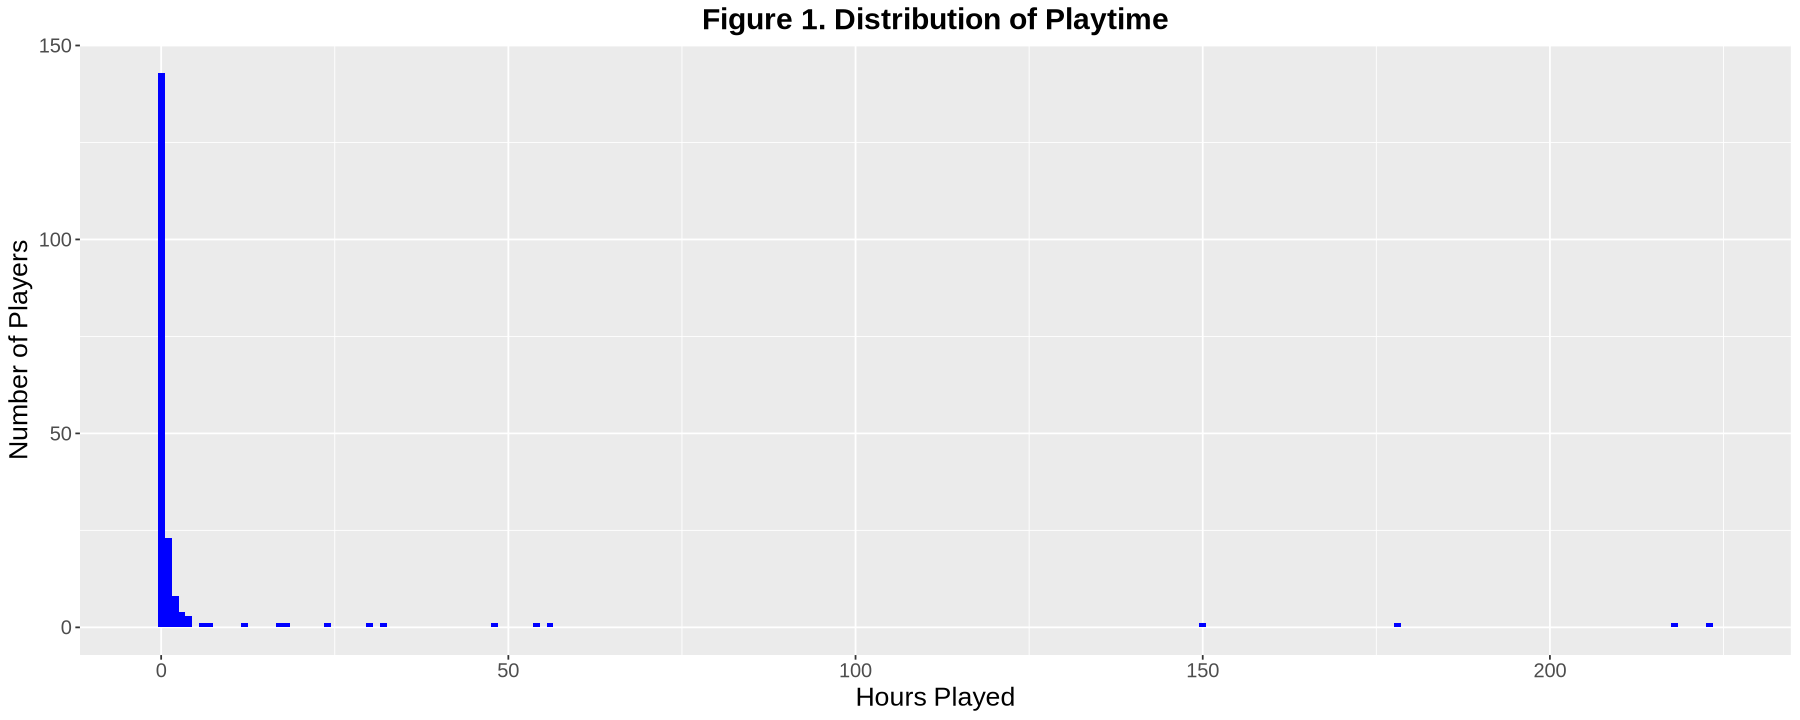

In [123]:
options(repr.plot.height = 6, repr.plot.width = 15)
fig_1 <- ggplot(players_wrangled_data, aes(x = played_hours)) +
    geom_histogram(binwidth = 1, fill = "blue") +
    labs(title = "Figure 1. Distribution of Playtime",
        x = "Hours Played",
        y = "Number of Players") +
    theme(plot.title = element_text(size = 18, face="bold", hjust = 0.5), axis.title = element_text(size = 16), axis.text = element_text(size = 12))

fig_1

Figure 1: This distribution shows the playtime data is very heavily right-skewed, suggesting that a small group of players are contributing to the "high contributors" category. Few players have much higher playtime (~200+ hours long). This data indicates that the majority of players engaged briefly, suggesting low sustained engagement or casual players. Additionally, this graph addresses the mean playtime being higher than the median, given the skew. 

#### **b) Relationship Between Age and Playtime**

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


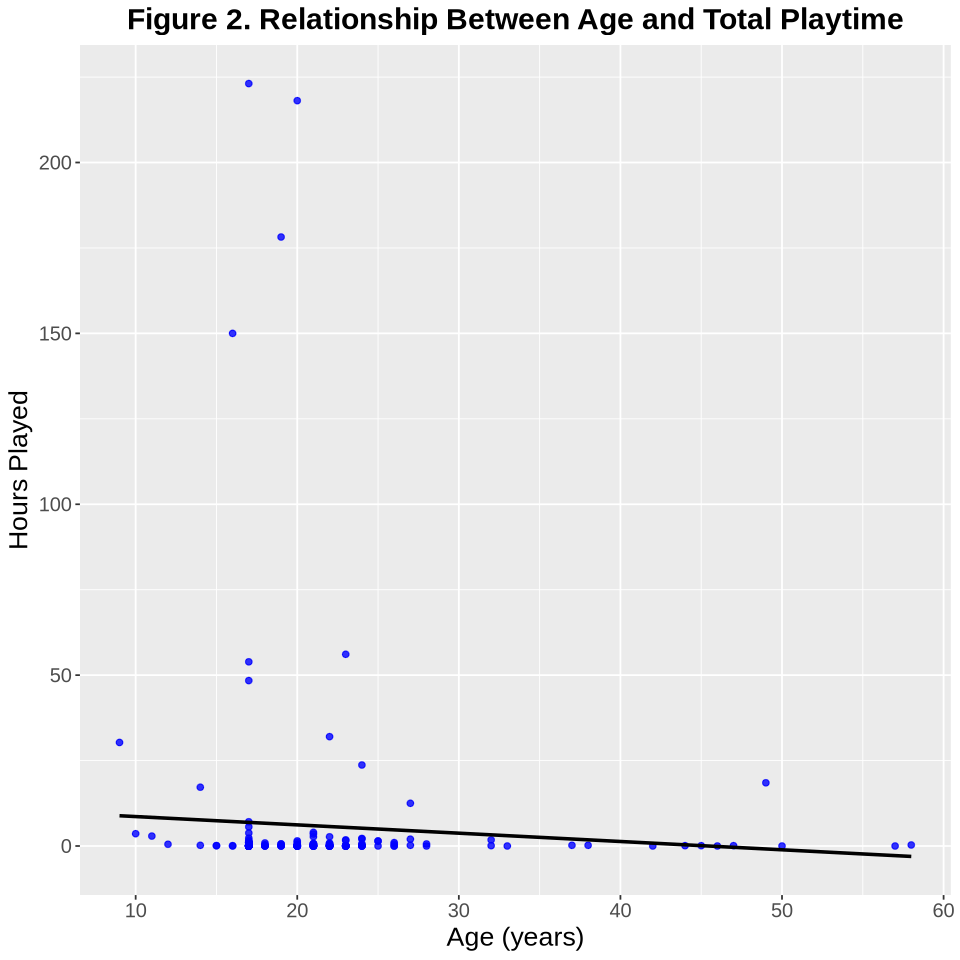

In [124]:
options(repr.plot.height = 8, repr.plot.width = 8)
fig_2 <- ggplot(players_wrangled_data, aes(x = Age, y = played_hours)) +
    geom_point(alpha = 0.8, color = "blue") +
    geom_smooth(method = "lm", se = FALSE, color = "black") +
    labs(title = "Figure 2. Relationship Between Age and Total Playtime",
        x = "Age (years)",
        y = "Hours Played") +
    theme(plot.title = element_text(size = 18, face="bold", hjust = 0.5), axis.title = element_text(size = 16), axis.text = element_text(size = 12))

fig_2

Figure 2: This scatter plot helps determine whether old or young players have more play time. A linear model was generated to observed any general trends. A visible negative trend suggest age influences contribution. Younger players under the age of 25 show a wider range of playtime with some spending over 200 hours, indicating more playtime among younger players. Overall, the graph suggests that younger participants tend to play more, while older participants play less, indicating a very weak negative correlation between age and total playtime.

#### **c) Average Playtime by Experience Level**

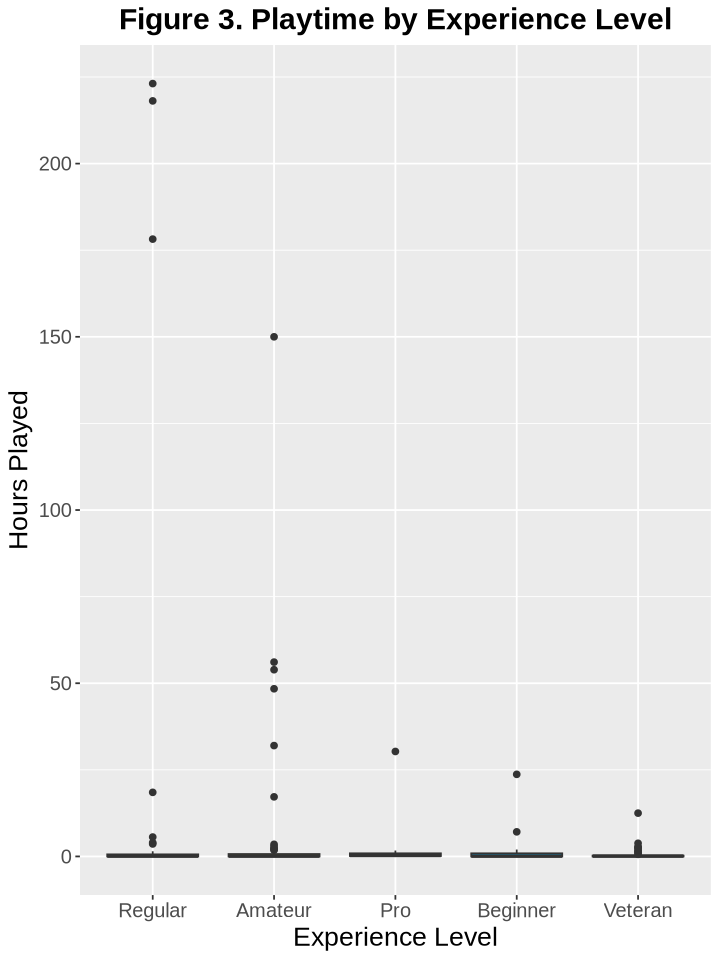

In [125]:
options(repr.plot.height = 8, repr.plot.width = 6)
fig_3 <- ggplot(players_wrangled_data, aes(x = experience, y = played_hours, fill = experience)) +
    geom_boxplot() +
    labs(title = "Figure 3. Playtime by Experience Level",
        x = "Experience Level",
        y = "Hours Played") +
    theme(plot.title = element_text(size = 18, face="bold", hjust = 0.5), axis.title = element_text(size = 16), axis.text = element_text(size = 12)) +
    theme(legend.position = "none")

fig_3

Figure 3: It appears that all experience levels have similar median hours played, with differing deviations. Regular and Amateur appear to have more outliers (more people in those categories have more play time). Overall, playtime appears highly variable across all experience levels, but the majority of participants, regardless of level, played only a few hours. A table of the mean, median, standard deviation, minimum, maximum, and counts of hour played for each category of experience level will be generated to better understand the relationship between playtime and experience levels. 

In [126]:
playtime_summary <- players_wrangled_data |>
    group_by(experience) |>
    summarise(
        mean_playtime = mean(played_hours, na.rm = TRUE),
        median_playtime = median(played_hours, na.rm = TRUE),
        sd_playtime = sd(played_hours, na.rm = TRUE),
        min_playtime = min(played_hours, na.rm = TRUE),
        max_playtime = max(played_hours, na.rm = TRUE),
        count = n()
    ) |>
    arrange(experience)

playtime_summary

experience,mean_playtime,median_playtime,sd_playtime,min_playtime,max_playtime,count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Regular,18.2083333,0.1,57.957346,0,223.1,36
Amateur,6.0174603,0.1,21.987214,0,150.0,63
Pro,2.6000000,0.3,7.988838,0,30.3,14
Beginner,1.2485714,0.1,4.105547,0,23.7,35
Veteran,0.6479167,0.1,1.937424,0,12.5,48


##### **Table 2. Summary of Playtime by Experience Level**
| experience | mean_playtime | median_playtime | sd_playtime | min_playtime | max_playtime | count |
|------------|---------------|----------------|-------------|--------------|--------------|-------|
| Regular    | 18.21         | 0.10           | 57.96       | 0.00         | 223.10       | 36    |
| Amateur    | 6.02          | 0.10           | 21.99       | 0.00         | 150.00       | 63    |
| Pro        | 2.60          | 0.30           | 7.99        | 0.00         | 30.30        | 14    |
| Beginner   | 1.25          | 0.10           | 4.11        | 0.00         | 23.70        | 35    |
| Veteran    | 0.65          | 0.10           | 1.94        | 0.00         | 12.50        | 48    |


Table 2: It is evident that the median playtime is about the same for all categories, confirming the data from Fig. 3. However, the mean playtime differs for each category. Regular players have the highest mean time (18.21 hours), and the widest spread of values. Pro, Beginner, and Veteran players all have relatively low averages, implying that most players in these categories contribute less data ovearll. This reinforces that a small subset of regular and amateur players are responsible for most of the total gameplay data. 

#### **d) Combined Age and Experience Trends**

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


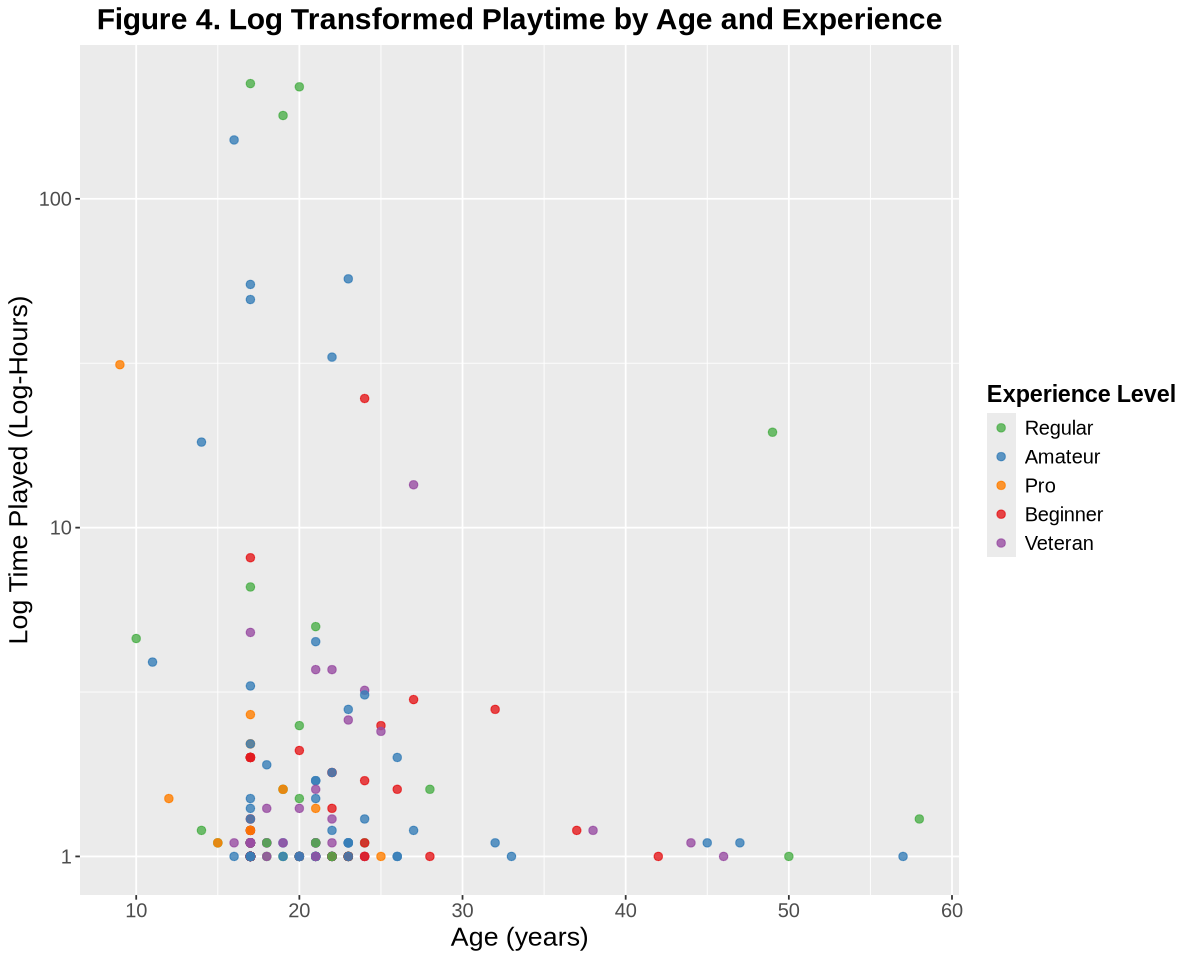

In [178]:
options(repr.plot.height = 8, repr.plot.width = 10)

players_wrangled_data_plus1 <- players_wrangled_data |> 
    mutate(played_hours_plus1 = played_hours + 1)

fig_4 <- ggplot(players_wrangled_data_plus1, aes(x = Age, y = played_hours_plus1, color = experience)) +
    scale_y_log10(labels=comma) +
    geom_point(size = 2, alpha = 0.8) +
    labs(title = "Figure 4. Log Transformed Playtime by Age and Experience",
        x = "Age (years)",
        y = "Log Time Played (Log-Hours)",
        color = "Experience Level") +
    scale_color_manual(
        values = c(
        "Beginner" = "#e41a1c",  
        "Amateur"  = "#377eb8", 
        "Regular"  = "#4daf4a",  
        "Pro"      = "#ff7f00",  
        "Veteran"  = "#984ea3"   
        )) +
    theme(plot.title = element_text(size = 18, face="bold", hjust = 0.5), 
          axis.title = element_text(size = 16), 
          axis.text = element_text(size = 12), 
          legend.title = element_text(size = 14, face = "bold"), 
          legend.text = element_text(size = 12))

fig_4

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


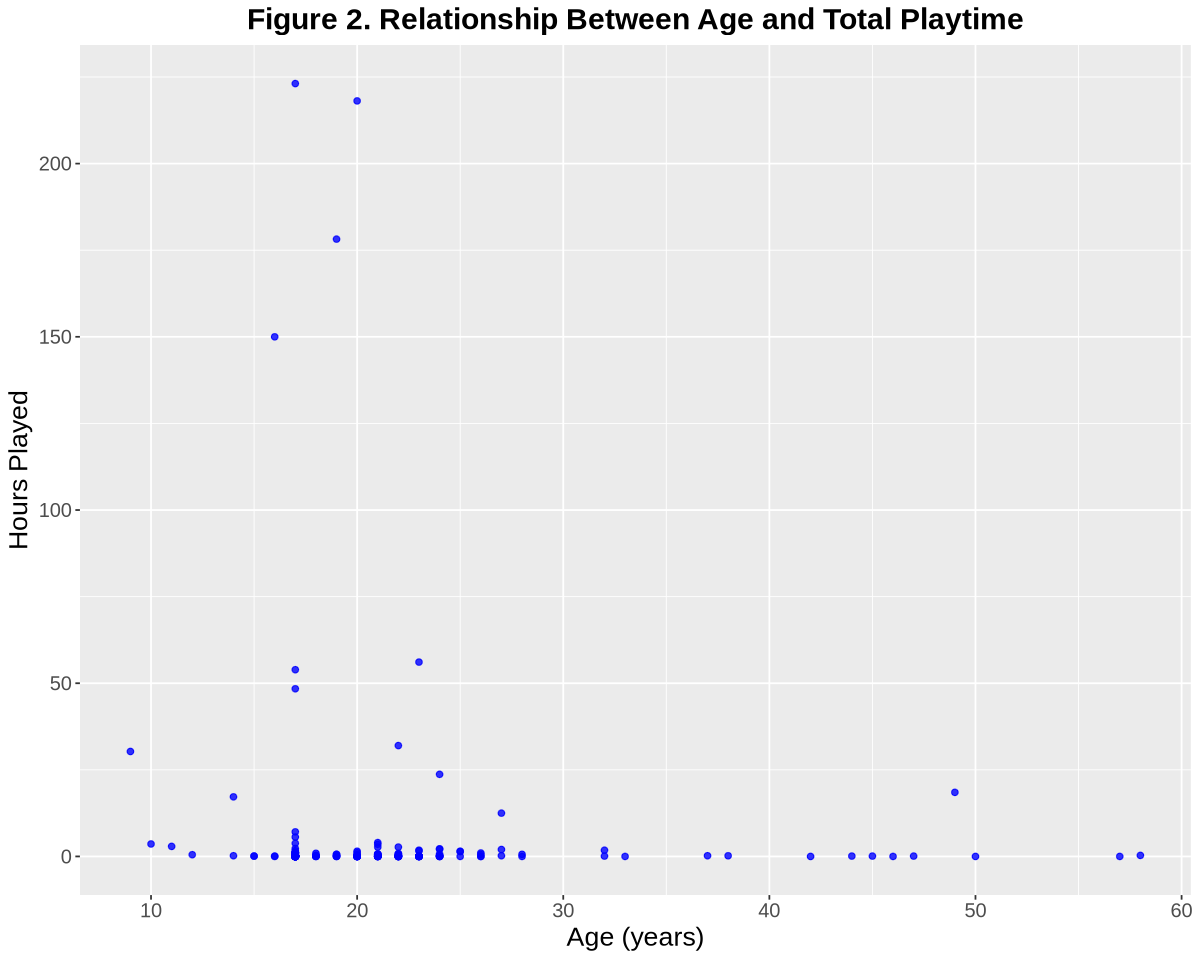

In [190]:
fig_2 <- ggplot(players_wrangled_data, aes(x = Age, y = played_hours)) +
    geom_point(alpha = 0.8, color = "blue") +
    labs(title = "Figure 2. Relationship Between Age and Total Playtime",
        x = "Age (years)",
        y = "Hours Played") +
    theme(plot.title = element_text(size = 18, face="bold", hjust = 0.5), axis.title = element_text(size = 16), axis.text = element_text(size = 12))
fig_2

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


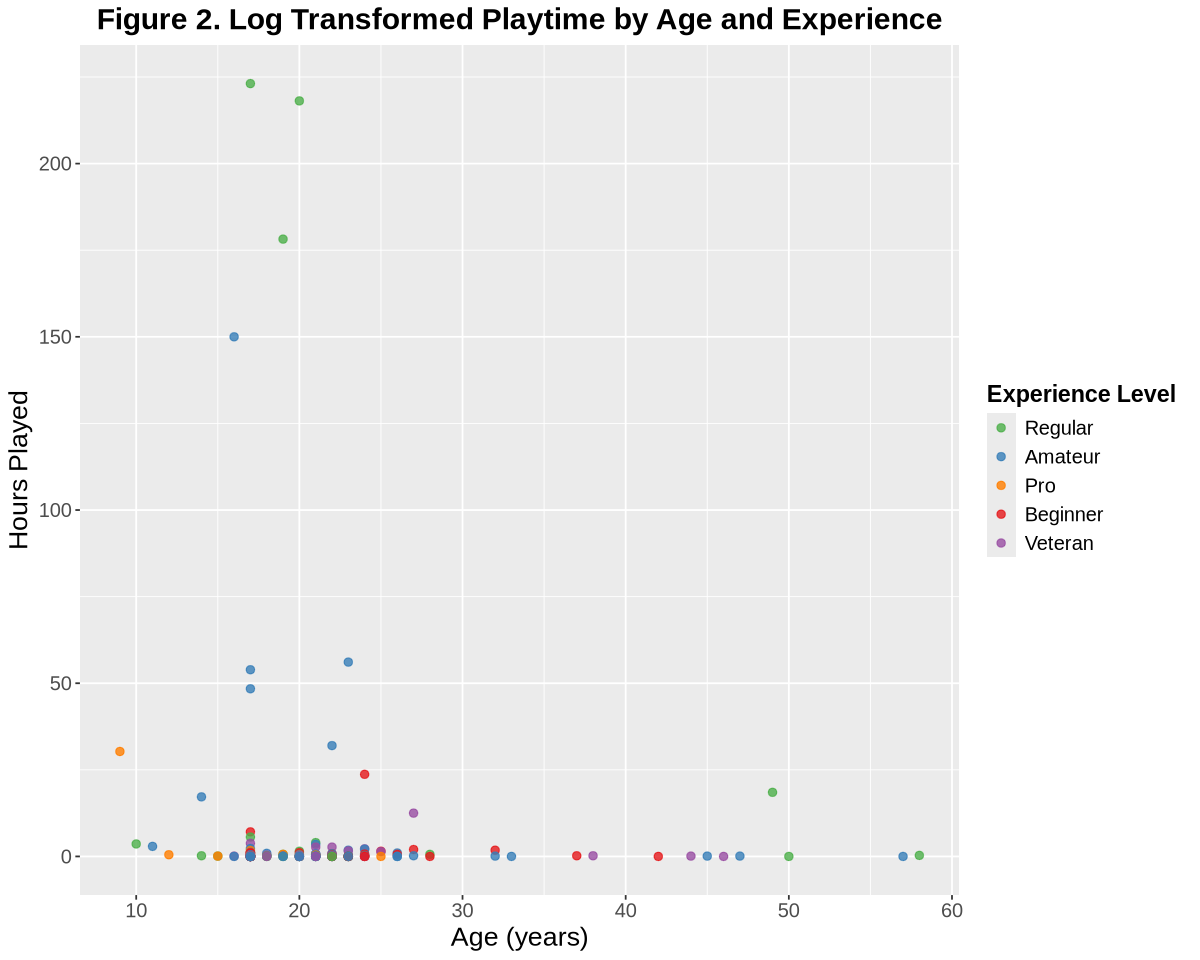

In [191]:
options(repr.plot.height = 8, repr.plot.width = 10)

fig_2 <- ggplot(players_wrangled_data, aes(x = Age, y = played_hours, color = experience)) +
    geom_point(size = 2, alpha = 0.8) +
    labs(title = "Figure 2. Log Transformed Playtime by Age and Experience",
        x = "Age (years)",
        y = "Hours Played",
        color = "Experience Level") +
    scale_color_manual(
        values = c(
        "Beginner" = "#e41a1c",  
        "Amateur"  = "#377eb8", 
        "Regular"  = "#4daf4a",  
        "Pro"      = "#ff7f00",  
        "Veteran"  = "#984ea3"   
        )) +
    theme(plot.title = element_text(size = 18, face="bold", hjust = 0.5), 
          axis.title = element_text(size = 16), 
          axis.text = element_text(size = 12), 
          legend.title = element_text(size = 14, face = "bold"), 
          legend.text = element_text(size = 12))

fig_2

Figures 4: These figures reveal interactions between age and experience. For instance, it appears that amateur and regular players tend to have higher playtimes, while beginners and veterans have lower playtimes. Additionally, the log transformation of the y-axis reduces the influence of extreme outliers and makes the data more balanced for easier visualization. This data confirms that younger players, tend to play more (particularly regular, amateur, or pro experience level), while older players show lower, more uniform playtime across experience groups.  

## **(4) Methods and Plan:**

A K-Nearest Neighbours (K-NN) classification model will be used. This method will predict whether a player is a high or low contributor based on their age and experience level. 

1. Prepare the data: Wrangle to create a binary response variable `contributor_type` (High if within top 25% of total hours played, low otherwise).
2. Encode the categorical variable `experience` as an ordered factor and standardize `Age` so that both predictors contribute equally to the distance metric.
3. Split the data: 70% will be used for training, 30% will be used for testing.
4. Tune for k: Use t-fold cross-validation, train K-NN models, and select optimal number of neighbors. 
8. Evaluate model performance on testing data using accuracy and confusion matrix.

The model assumes that predictors are scaled, sufficient data, and that age and hours are not strongly correlated. 

## **(4.5.1) Random Code**

In [128]:
# 1: Prepare the data
players_wrangled_data_2 <- players_wrangled_data |> 
  mutate(high_contributor = if_else(played_hours >= quantile(played_hours, 0.75), "High", "Low")) |> 
  mutate(high_contributor = factor(high_contributor))

players_wrangled_data_2

experience,Age,played_hours,high_contributor
<fct>,<dbl>,<dbl>,<fct>
Regular,17,223.1,High
Regular,20,218.1,High
Regular,19,178.2,High
Amateur,16,150.0,High
⋮,⋮,⋮,⋮
Amateur,17,0,Low
Amateur,20,0,Low
Amateur,17,0,Low
Amateur,57,0,Low


In [129]:
# 2 : Encode experience as ordered factor; Standardize age


In [130]:
# 3 : Split data
set.seed(123)

data_split <- initial_split(players_wrangled_data_2, prop = 0.7, strata = high_contributor)
train_data <- training(data_split)
test_data <- testing(data_split) |>
    drop_na()

players_recipe <- recipe(high_contributor ~ Age + experience, data = train_data) |>
  step_novel(all_nominal_predictors()) |>
  step_dummy(all_nominal_predictors()) |>
  step_zv(all_predictors()) |>
  step_normalize(all_numeric_predictors())

train_data <- players_wrangled_data_2 |>
  select(Age, experience, played_hours, high_contributor) |>
  drop_na()


In [131]:
# 4 : Tune for k
set.seed(123)

folds <- vfold_cv(train_data, v=5, strata = high_contributor)

knn_tune <- nearest_neighbor(weight_func = "rectangular",
    neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_tune <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = folds, grid = k_vals) 

accuracies <- knn_tune |> 
    collect_metrics() |>
    filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.3917341,5,0.03420445,Preprocessor1_Model01
2,accuracy,binary,0.3860796,5,0.02764699,Preprocessor1_Model02
3,accuracy,binary,0.4429015,5,0.03851332,Preprocessor1_Model03
4,accuracy,binary,0.4426518,5,0.03334597,Preprocessor1_Model04
⋮,⋮,⋮,⋮,⋮,⋮,⋮
7,accuracy,binary,0.5156478,5,0.06780131,Preprocessor1_Model07
8,accuracy,binary,0.5156478,5,0.06223994,Preprocessor1_Model08
9,accuracy,binary,0.6395951,5,0.06383749,Preprocessor1_Model09
10,accuracy,binary,0.6289339,5,0.06990666,Preprocessor1_Model10


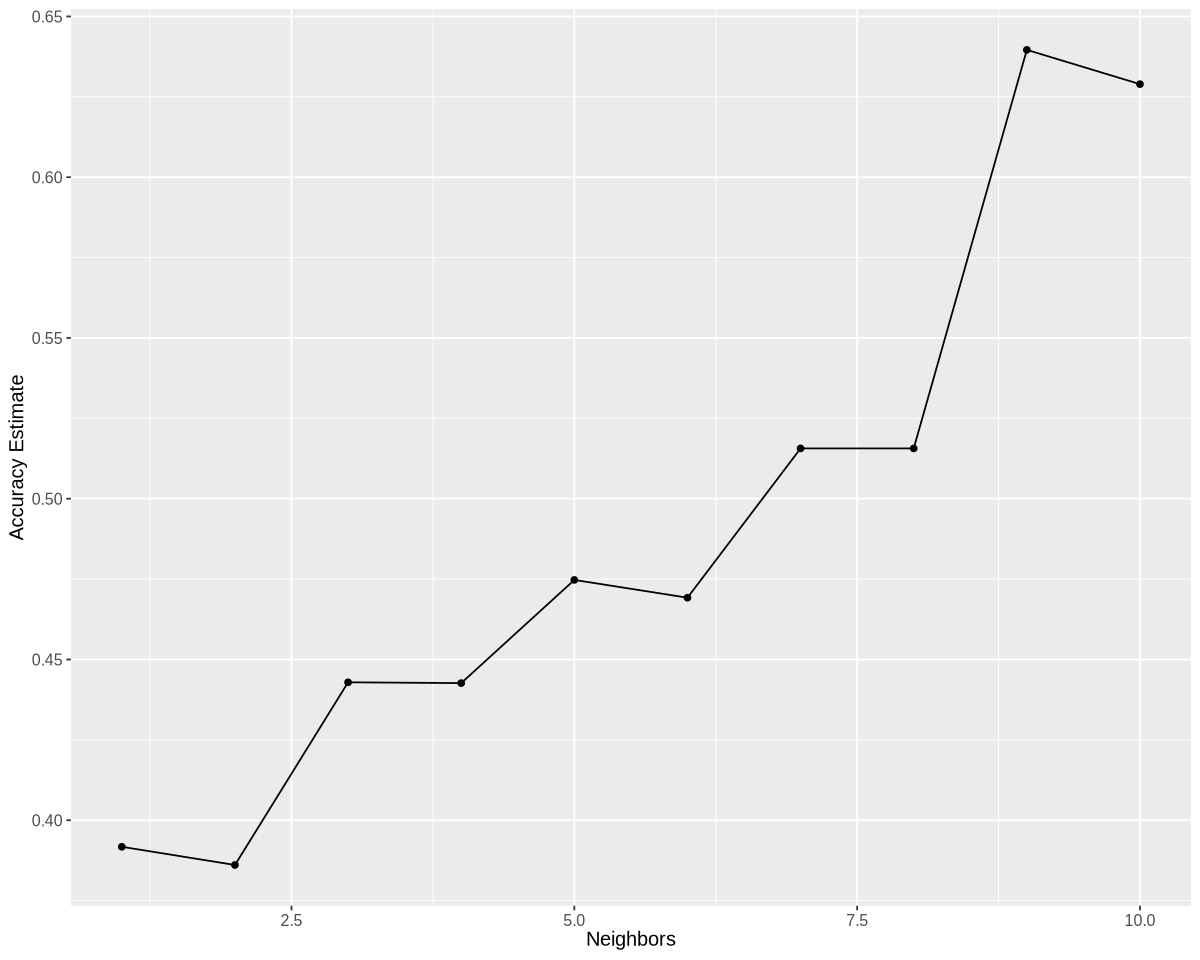

In [132]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 12))

accuracy_vs_k

In [133]:
# 4 : Select optimal k
optimal_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
optimal_k

[1] 9

In [134]:
# 4 : K-NN model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = optimal_k) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_results <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
    fit(data = train_data)

players_predictions <- predict(knn_results, test_data) |>
   bind_cols(test_data)

players_predictions

.pred_class,experience,Age,played_hours,high_contributor
<fct>,<fct>,<dbl>,<dbl>,<fct>
Low,Regular,17,223.1,High
Low,Regular,20,218.1,High
Low,Amateur,17,53.9,High
Low,Regular,21,4.0,High
⋮,⋮,⋮,⋮,⋮
Low,Veteran,17,0,Low
Low,Regular,22,0,Low
Low,Veteran,20,0,Low
Low,Beginner,17,0,Low


In [135]:
# 5 : Accuracy
players_predictions |>
    metrics(truth = high_contributor, estimate = .pred_class) |>
    filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7457627


In [136]:
players_predictions |> pull(high_contributor) |> levels()

players_predictions |>
    precision(truth = high_contributor, estimate = .pred_class, event_level = "first")

[1] "High" "Low"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.6666667


In [137]:
players_predictions  |>
  recall(truth =high_contributor, estimate = .pred_class, event_level = "first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.125


#### Table: Title
| Metric | Value | 
|----------|----------|
| Accuracy  | 74.58%  |
| Precision | 66.67%  |
| Recall    | 12.5%  |

In [138]:
confusion <- players_predictions  |>
             conf_mat(truth = high_contributor, estimate = .pred_class)
confusion

          Truth
Prediction High Low
      High    2   1
      Low    14  42

In [139]:
set.seed(123)
# Alternative Tuning; 25/75 split of the training data into another training/validation
data_split_2 <- initial_split(train_data, prop = 0.75, strata = high_contributor)
train_data_2 <- training(data_split_2)
player_validation <- testing(data_split_2)

In [140]:
# New recipe for training data
players_recipe_2 <- recipe(high_contributor ~ Age + experience, data = train_data_2) 

In [141]:
set.seed(123)
# Fit knn model (using old knn_spec from before)
knnn_fit <- workflow() |>
    add_recipe(players_recipe_2) |>
    add_model(knn_spec) |>
    fit(data = train_data_2)

In [142]:
# Predictions on validation data
validation_predicted <- predict(knnn_fit, player_validation) |>
    bind_cols(player_validation)

# Validation data accuracy
validation_accuracy <- validation_predicted |>
    metrics(truth = high_contributor, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    select(.estimate) |>
    pull()
validation_accuracy

[1] 0.72

In [143]:
set.seed(123)
players_vfold_5 <- vfold_cv(train_data_2, v = 5, strata = high_contributor)

knn_tune_2 <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

In [144]:
k_vals_2 <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results_2 <- workflow() |>
    add_recipe(players_recipe_2) |>
    add_model(knn_tune_2) |>
    tune_grid(resamples = players_vfold_5, grid = k_vals_2) |>
    collect_metrics()

accuracies_2 <- knn_results_2 |>
    filter(.metric == "accuracy")

accuracies_2

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.3955665,5,0.04515928,Preprocessor1_Model01
2,accuracy,binary,0.3960591,5,0.04868132,Preprocessor1_Model02
3,accuracy,binary,0.6743842,5,0.03429223,Preprocessor1_Model03
4,accuracy,binary,0.6884236,5,0.03824085,Preprocessor1_Model04
⋮,⋮,⋮,⋮,⋮,⋮,⋮
7,accuracy,binary,0.6669951,5,0.03117880,Preprocessor1_Model07
8,accuracy,binary,0.6600985,5,0.03603138,Preprocessor1_Model08
9,accuracy,binary,0.6741379,5,0.03781330,Preprocessor1_Model09
10,accuracy,binary,0.6948276,5,0.03266775,Preprocessor1_Model10


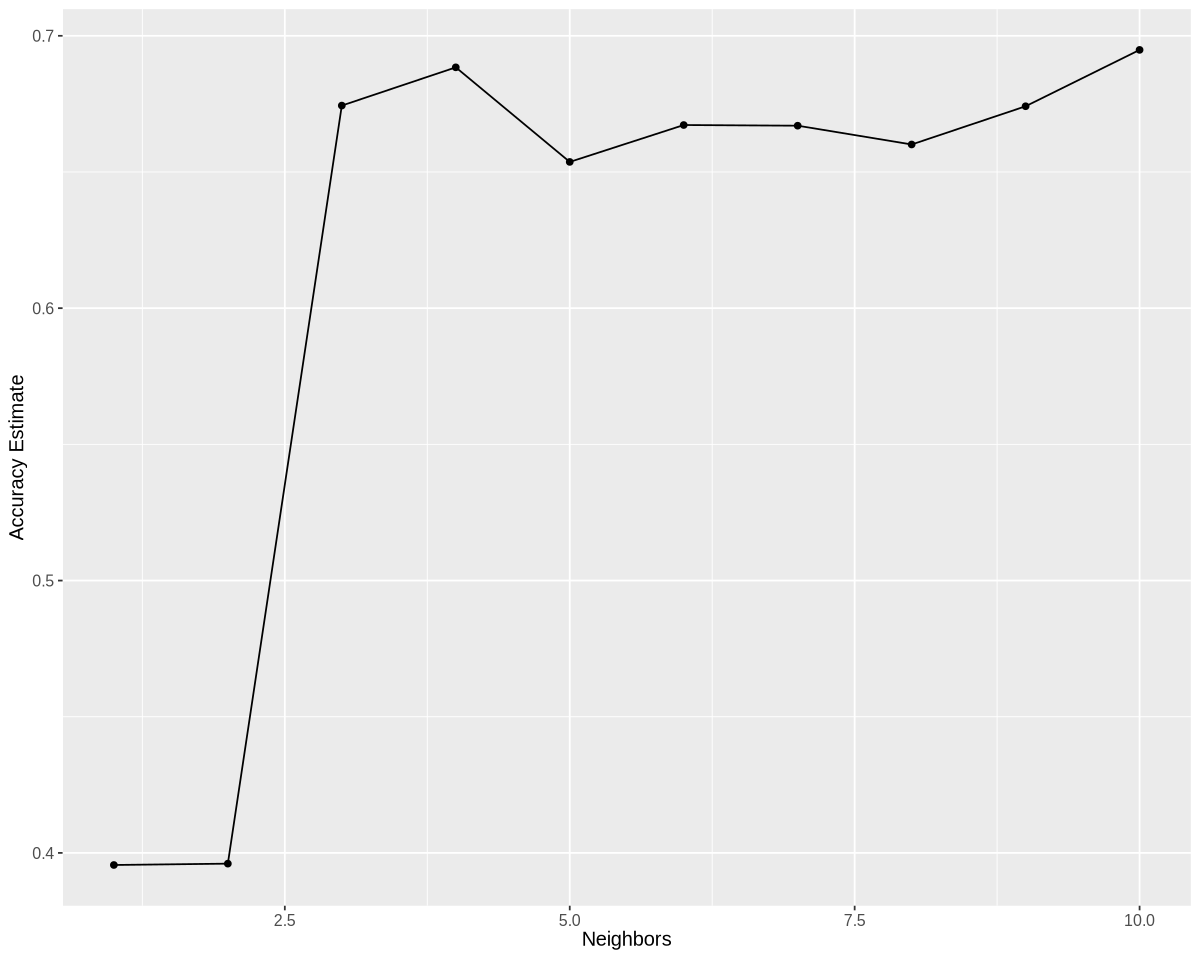

In [145]:
accuracy_vs_k_2 <- ggplot(accuracies_2, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k_2

In [146]:
optimal_k_2 <- accuracies_2 |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
optimal_k_2

[1] 10

In [147]:
knn_spec_2 <- nearest_neighbor(weight_func = "rectangular", 
                               neighbors = optimal_k_2) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit_2 <- workflow() |>
  add_recipe(players_recipe_2) |>
  add_model(knn_spec_2) |>
  fit(data = train_data_2)

knn_fit_2

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(10,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2916667
Best kernel: rectangular
Best k: 10

In [148]:
players_test_predictions <- predict(knn_fit_2, test_data) |>
  bind_cols(test_data)

## Accuracy Value
players_test_predictions |>
    metrics(truth = high_contributor, estimate = .pred_class) |>
    filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7457627


In [149]:
players_test_predictions |> pull(high_contributor) |> levels()

players_test_predictions |>
    precision(truth = high_contributor, estimate = .pred_class, event_level = "first")

[1] "High" "Low"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,1


In [150]:
players_test_predictions |> pull(high_contributor) |> levels()

players_test_predictions |>
  recall(truth = high_contributor, estimate = .pred_class, event_level = "first")

[1] "High" "Low"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.0625


In [151]:
confusion1 <- players_test_predictions  |>
             conf_mat(truth = high_contributor, estimate = .pred_class)
confusion1

          Truth
Prediction High Low
      High    1   0
      Low    15  43

## **(5) GitHub Repository:**

https://github.com/never-knowing/dsci100_project

## **References**

[1] Pacific Laboratory of Artificial Intelligence. (2024, March 19). Plaicraft. PLAICraft. https://plaicraft.ai/

# ✅ **Do you need each step?**

### **1. `step_dummy(all_nominal_predictors())`**

**Needed if:**

* You have categorical predictors.

**Not needed if:**

* All predictors (`Age` and `experience`) are numeric (which sounds likely).

👉 If both predictors are numeric, you can remove this step.

---

### **2. `step_novel(all_nominal_predictors())`**

This is only for handling unseen categories in categorical variables.

**Needed if:**

* You have categorical predictors.

**Not needed if:**

* All predictors are numeric.

👉 If all predictors are numeric, remove this step too.

---

### **3. `step_zv(all_predictors())`**

Removes zero-variance predictors.

**Needed if:**

* It’s generally safe to keep, doesn’t hurt, but may not be necessary for just two numeric variables.

👉 Optional but harmless. Most people keep it.

---

### **4. `step_normalize(all_numeric_predictors())`**

Standardizes numeric variables.

**Needed if:**

* You are using models sensitive to scale
  (e.g., logistic regression, KNN, SVM, neural nets).

**Not needed if:**

* You use tree-based models (random forest, XGBoost, decision trees), which ignore scaling.

👉 Use it if using regression, SVM, KNN, etc.
👉 Safe to keep.

---

# 🎯 **Likely answer for your case**

If `Age` and `experience` are **numeric**, and your model is not tree-based, then you probably only need:

```r
players_recipe <- recipe(high_contributor ~ Age + experience, data = train_data) |>
    step_zv(all_predictors()) |>
    step_normalize(all_numeric_predictors())
```

If you **are** using a tree-based model, then you only need:

```r
players_recipe <- recipe(high_contributor ~ Age + experience, data = train_data)
```

(no preprocessing necessary)

---

If you tell me **what model** you’re using and the **data types** of `Age` and `experience`, I can tell you exactly which steps to keep.
